In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import string
import re
import spacy

## **Text Analytics**

In [18]:
data = pd.read_csv("../../data/final_filtered_annotated_reviews.csv")

In [19]:
data.shape

(13594, 2)

In [20]:
data.columns.tolist()

['the_review', 'topics']

In [21]:
# Get some samples
data.sample(n=2, random_state=42)

,the_review,topics
1061,"It is a nice mouse, and I liked that it came w...",mouse
3881,Worth it,headphone


In [22]:
data.shape

(13594, 2)

In [23]:
data.dtypes

the_review    object
topics        object
dtype: object

In [31]:
text_eda = data.copy()

In [32]:
text_eda.shape

(13594, 2)

In [33]:
text_eda.sample(n=1,random_state=42)

,the_review,topics
1061,"It is a nice mouse, and I liked that it came w...",mouse


In [34]:
import math
text_eda['the_review_length'] = text_eda.the_review.apply(lambda x: math.floor(len(x.split())))

In [35]:
text_eda.sample(n=1,random_state=42)

,the_review,topics,the_review_length
1061,"It is a nice mouse, and I liked that it came w...",mouse,61


In [40]:
# Custom rc definitions
rc = {
        'axes.spines.right': True,
        'axes.spines.top': True,
        'font.family': ['sans-serif'],
        'font.sans-serif':
        # 'Arial',
        'DejaVu Sans',
        # 'Liberation Sans',
        # 'Bitstream Vera Sans',
        # 'sans-serif',
        "xtick.bottom":True,
        'axes.edgecolor': 'indigo',
        'xtick.color': 'black',
        'figure.facecolor': "snow",
        'grid.color': 'grey',
        
}


# font definitions
font_label = {'family': 'serif',
        'color':  'darkred',
        'weight': 'semibold',
        'size': 16,
        }

font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'semibold',
        'size': 16,
        }

font_fig = {'family': 'sans',
        'color':  'chocolate',
        # 'weight': 'bold', # doesn't apply to it. Must be specified independently
        # 'fontsize': 30, # doesn't apply to it. Must be specified independently
        }

In [45]:
def plotting_count(data,x:str,hue:str=None):    
    try:
        fig, ax = plt.subplots(figsize=(20,5))
        sns.set_theme(style='whitegrid',rc=rc)

        ordering = data[x].value_counts()
        my_palette = sns.color_palette('bright')
        sns.countplot(data=data, x=x, hue=hue,palette=my_palette,
        order=ordering.sort_values().index[::-1], # descending order
        )
        ax.tick_params(axis='x', rotation=45,labelsize=30)
        ax.tick_params(axis='y', labelsize=30)
        ax.set_title(f'Count plot of number of {x}',fontdict=font_title)

        ax.set_xlabel(f"{x}", fontdict=font_label)
        ax.set_ylabel("Count", fontdict=font_label)
    except ValueError:
            print(f"The wrong Value was passed\nPlease look are the information below\n")
            data.info(memory_usage='deep')
    except KeyError:
            print(f"The wrong Key was passed\nPlease look are the information below\n")
            data.info(memory_usage='deep')

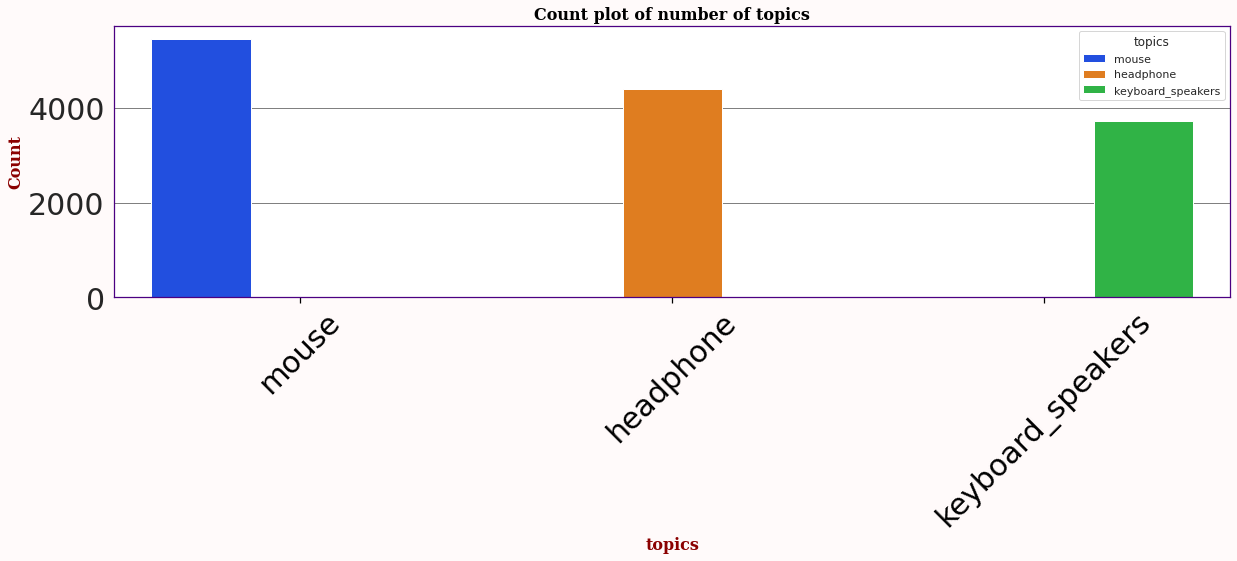

In [48]:
plotting_count(text_eda,'topics','topics')

In [49]:
text_eda.columns.to_list()

['the_review', 'topics', 'the_review_length']

In [124]:
# Looking into Review Score by review_title_length
(text_eda.groupby('topics')['topics'].agg(
    [
        ("Count",'count'),
    ]
)).sort_values(by='Count').reset_index()

,topics,Count
0,keyboard_speakers,3735
1,headphone,4393
2,mouse,5466


**Observation**
- There are more mouse topics
- keyboard_speakers is below 4000, while others are above 4000
- There are more mouse and headphone topics than keyboard_speakers topic; indicating data imbalance


In [63]:
def plotting_box(data,x:str=None,y:str=None,hue:str=None):
    try:
        fig,ax = plt.subplots(1, figsize=(20,10),constrained_layout=True)
        sns.set_theme(style='whitegrid',rc=rc,palette='bright')
        # ax = ax.ravel()

        sns.boxplot(data=data,y=y,x=x,hue=hue,ax=ax)
        ax.set_title(f'Box plot of {x} by {y}',fontdict=font_title)
        ax.set_xlabel(f"{x}", fontdict=font_label)
        ax.set_ylabel(f"{y}", fontdict=font_label)
        ax.tick_params(axis='both',labelsize=30)
        fig.suptitle("Box Plot Compasrion",fontdict=font_fig,fontsize=30,fontweight='bold')

    except ValueError:
            print(f"The wrong Value was passed\nPlease look are the information below\n")
            data.info(memory_usage='deep')
    except KeyError:
            print(f"The wrong Key was passed\nPlease look are the information below\n")
            data.info(memory_usage='deep')

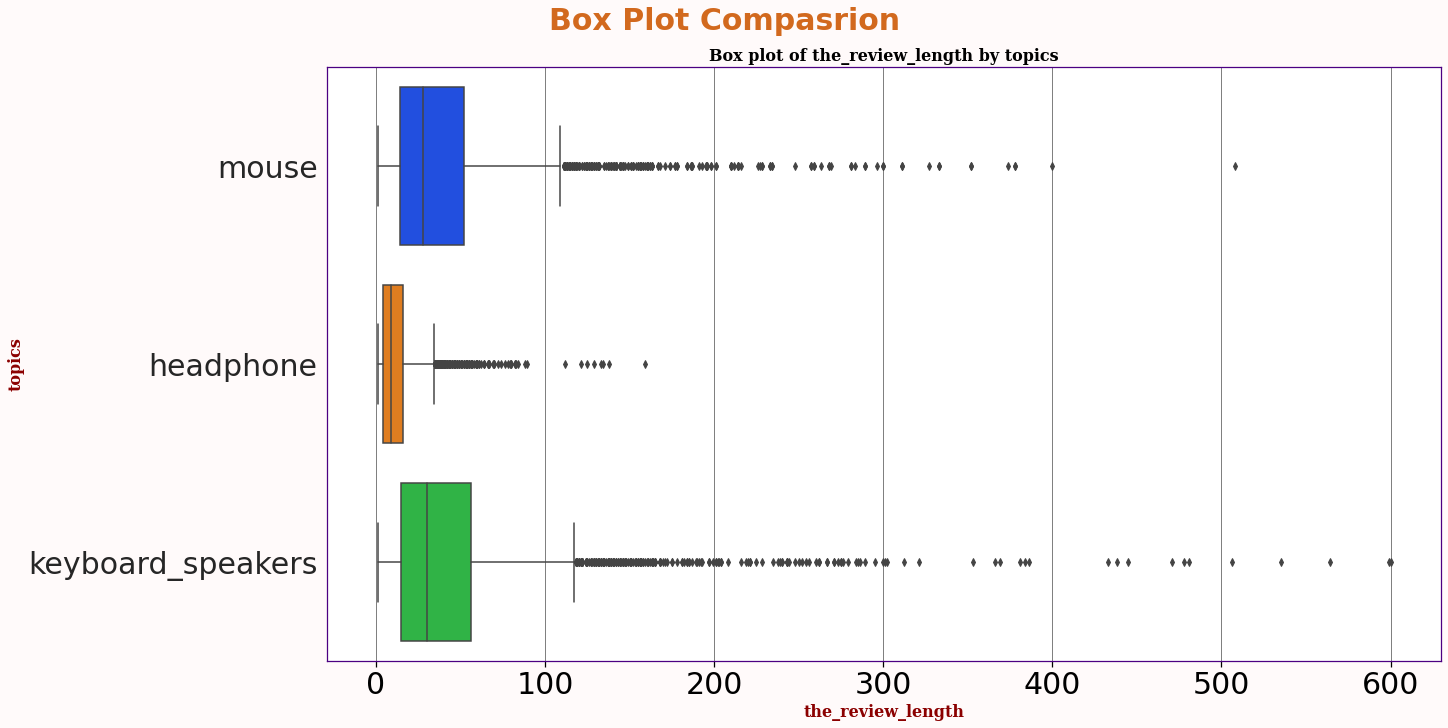

In [65]:
plotting_box(text_eda,'the_review_length',"topics")

**Observation**
- Headphone topics are below 200 word length.
- keyboard_speakers topics have the highest word length; 600

In [102]:
def Hist_Box_topics(data, topic ,var):
    fig, ax = plt.subplots(2,1, figsize=(20,15))
    ax = ax.ravel()
    sns.set_theme(style='whitegrid',rc=rc)

    cond = data.topics == topic
    the_topic = data[cond]
    # Histogram and Box plot
    plot1 = sns.histplot(data=the_topic, kde=True,x= var,ax=ax[0])
    plot2 = sns.boxplot(data=the_topic, x=var,ax=ax[1])

    # Editing the title and labels
    plot1.set_title(f'Skewness of {var} for {topic} is: {np.around(the_topic[var].skew(axis=0),3)}',fontdict=font_title)
    plot1.set_xlabel(f"{var}",fontdict=font_label)
    plot1.set_ylabel(None,fontdict=font_label)
    plot1.tick_params(axis='both',labelsize=30)
    
    plot2.set_title(f'Box plot of {var} at {topic}', fontdict=font_title)
    plot2.set_xlabel(f"{var}",fontdict=font_label)
    plot2.tick_params(axis='both',labelsize=30)
    plt.subplots_adjust(hspace = 0.4)

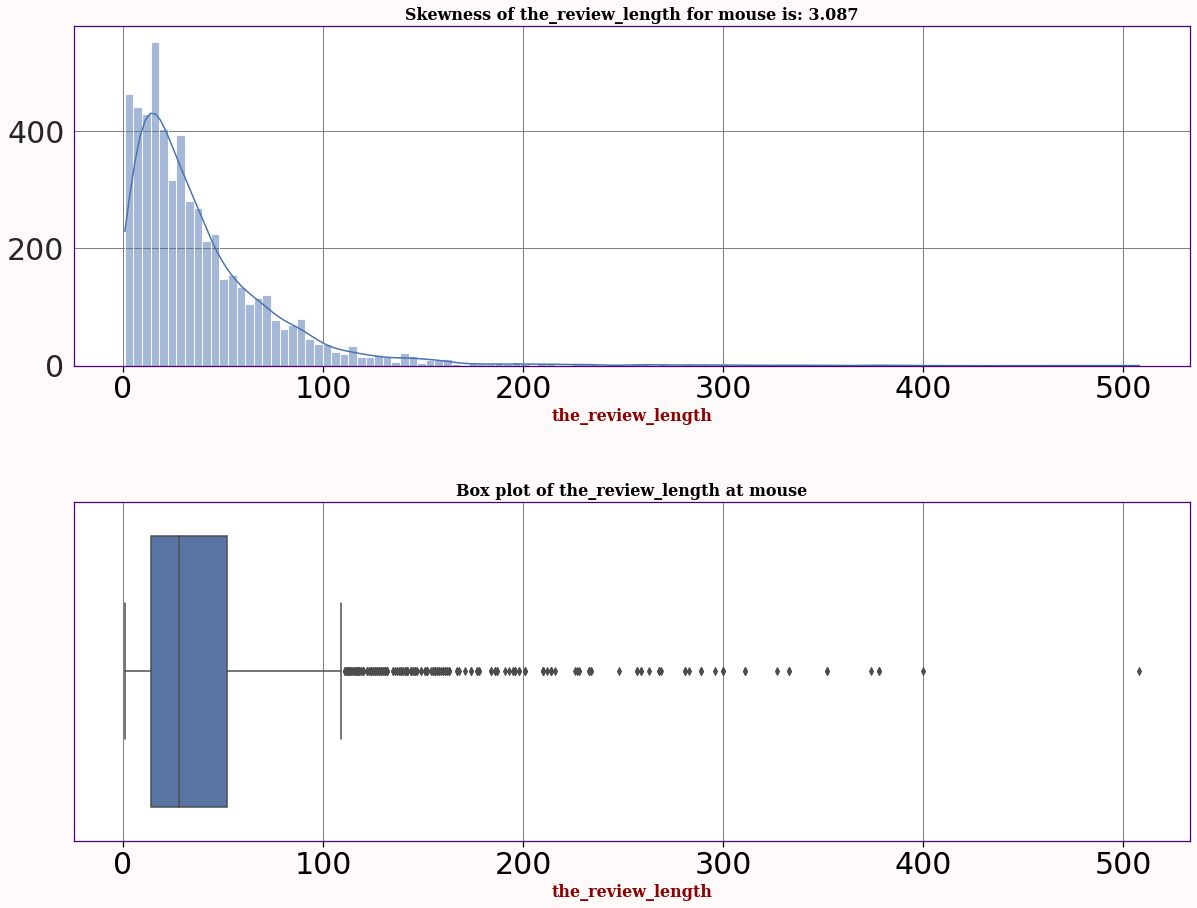

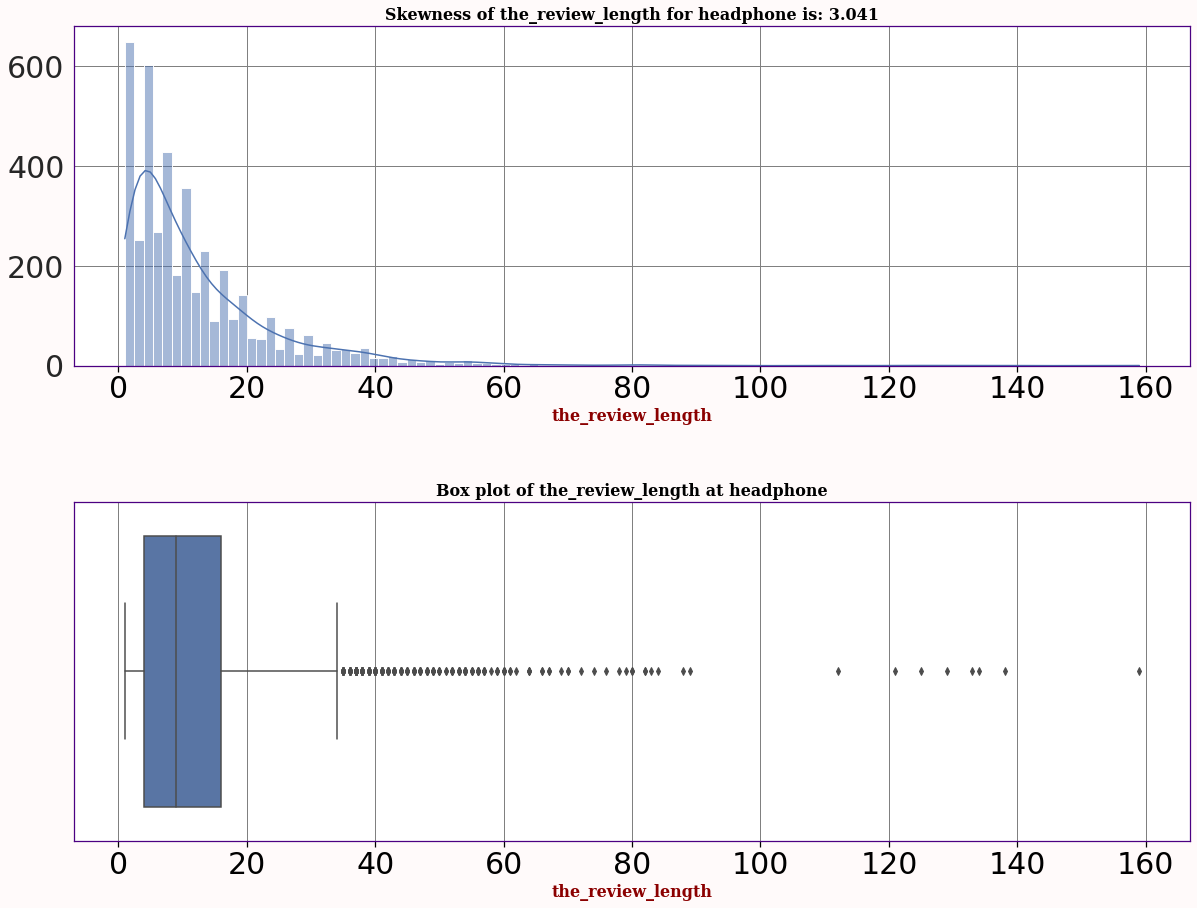

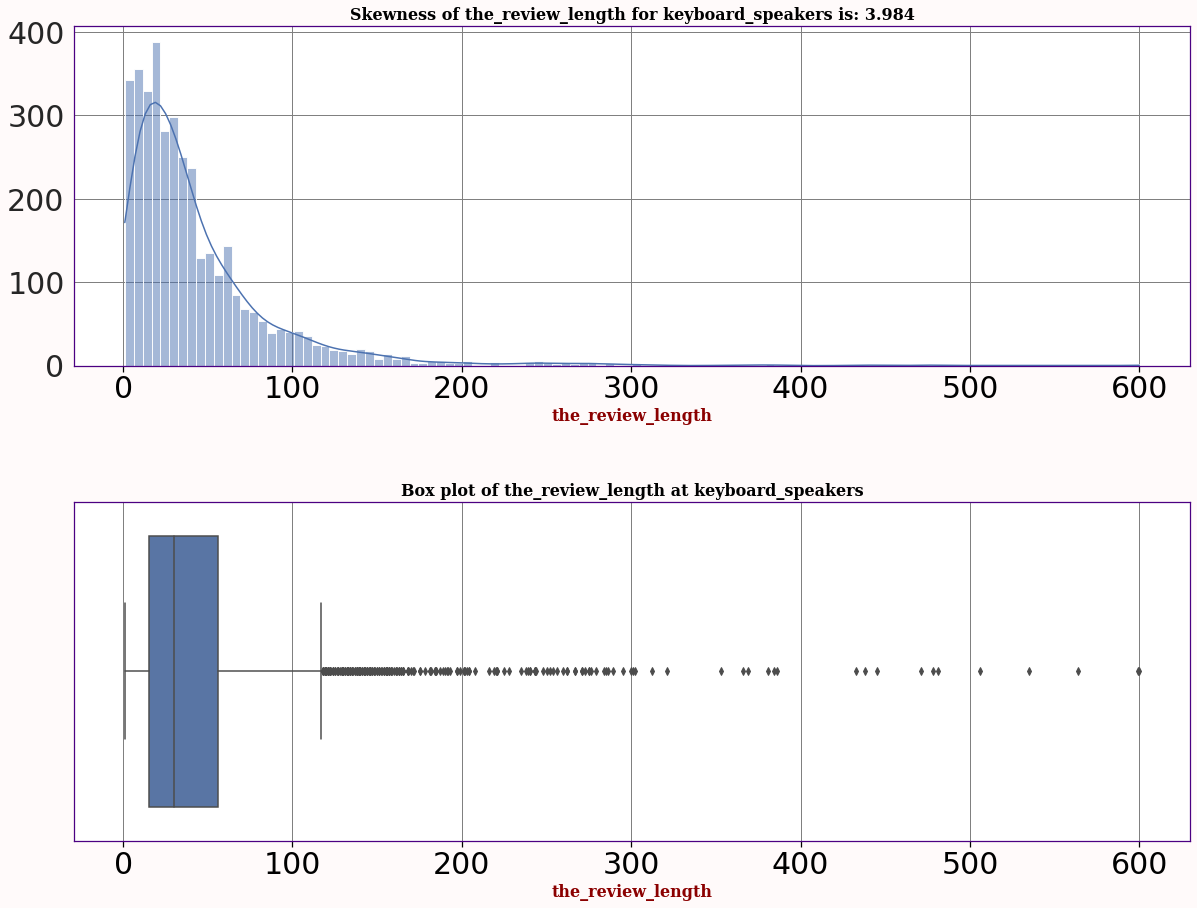

In [103]:
topics_list = text_eda.topics.unique().tolist()
for topic in topics_list:
    Hist_Box_topics(text_eda,topic,'the_review_length')

**Observation**
- The histograms confirms what the box plots has informed.

### **Word Cloud**

In [ ]:
from PIL import Image
mask = np.array(Image.open('img/cloud.png'))
# https://amueller.github.io/word_cloud/auto_examples/masked.html
def topics_word_cloud(topic:str="mouse"):
    try:
        value = (text_eda.topics == topic) # boolean
        the_topic = text_eda[value] # new data frame
        stopwords = set(STOPWORDS)
        wc = WordCloud(max_font_size=40,
                       background_color="white",
                       max_words=100,
                       stopwords=stopwords,
                       mask=mask,
                       margin=10,
                       random_state=42,
                       repeat=True
                       )
        wc.generate(str(the_topic.the_review.values))

        # write it to as image file
        wc.to_file(f"img/topics_word_cloud/{topic}_word_cloud.png")
        print(f"Word Cloud file for {topic} has been cretaed")
        path = f"img/topics_word_cloud/{topic}_word_cloud.png"
        display(Image.open(path))
    except ValueError:
        print("You selected a wrong value\nHere are the topics present")
        print(text_eda.topics.unique().tolist())


Word Cloud file for mouse has been cretaed


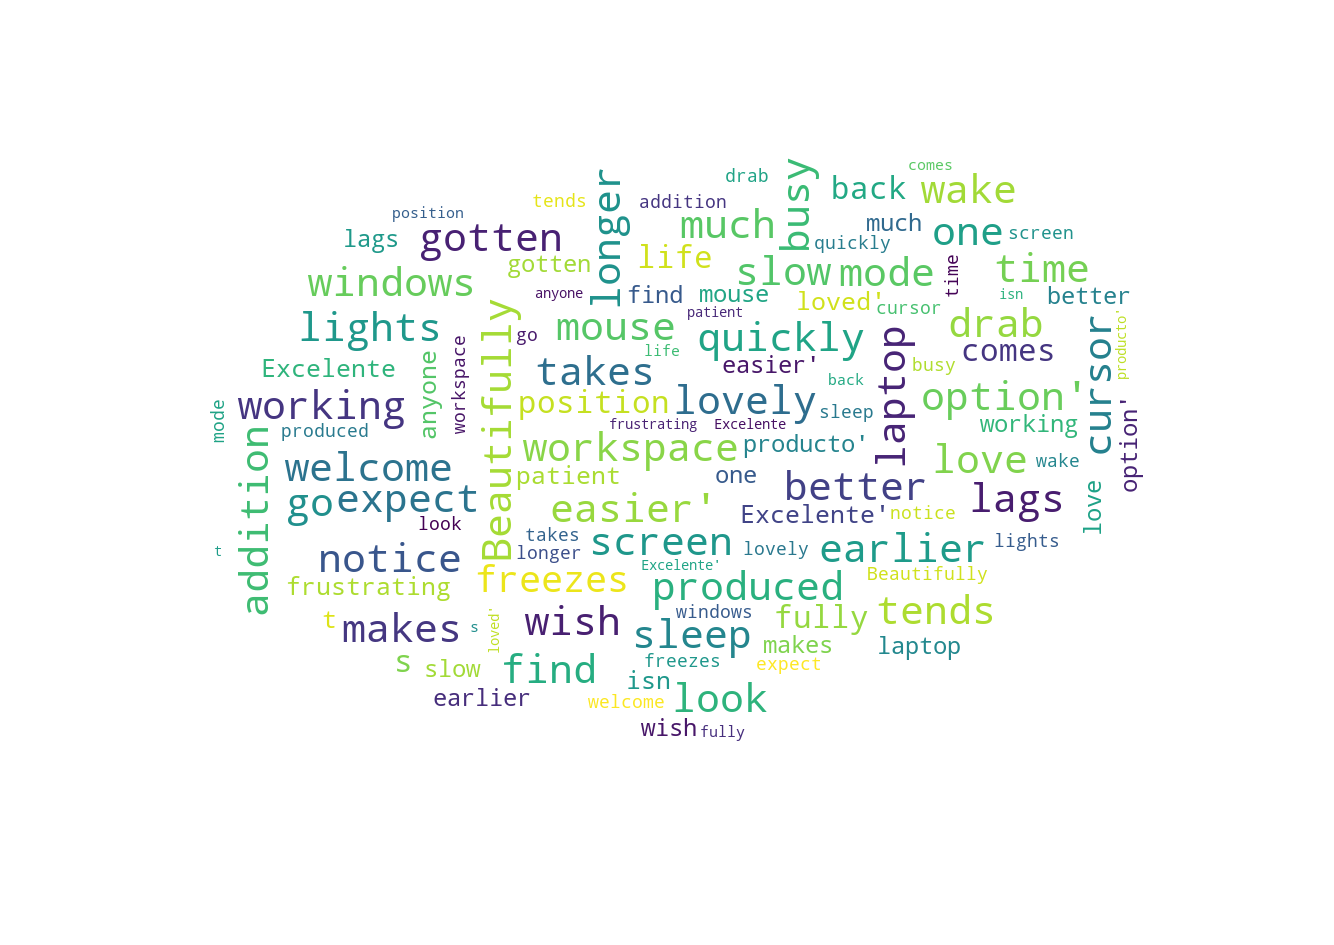

In [110]:
topics_word_cloud()

Word Cloud file for headphone has been cretaed


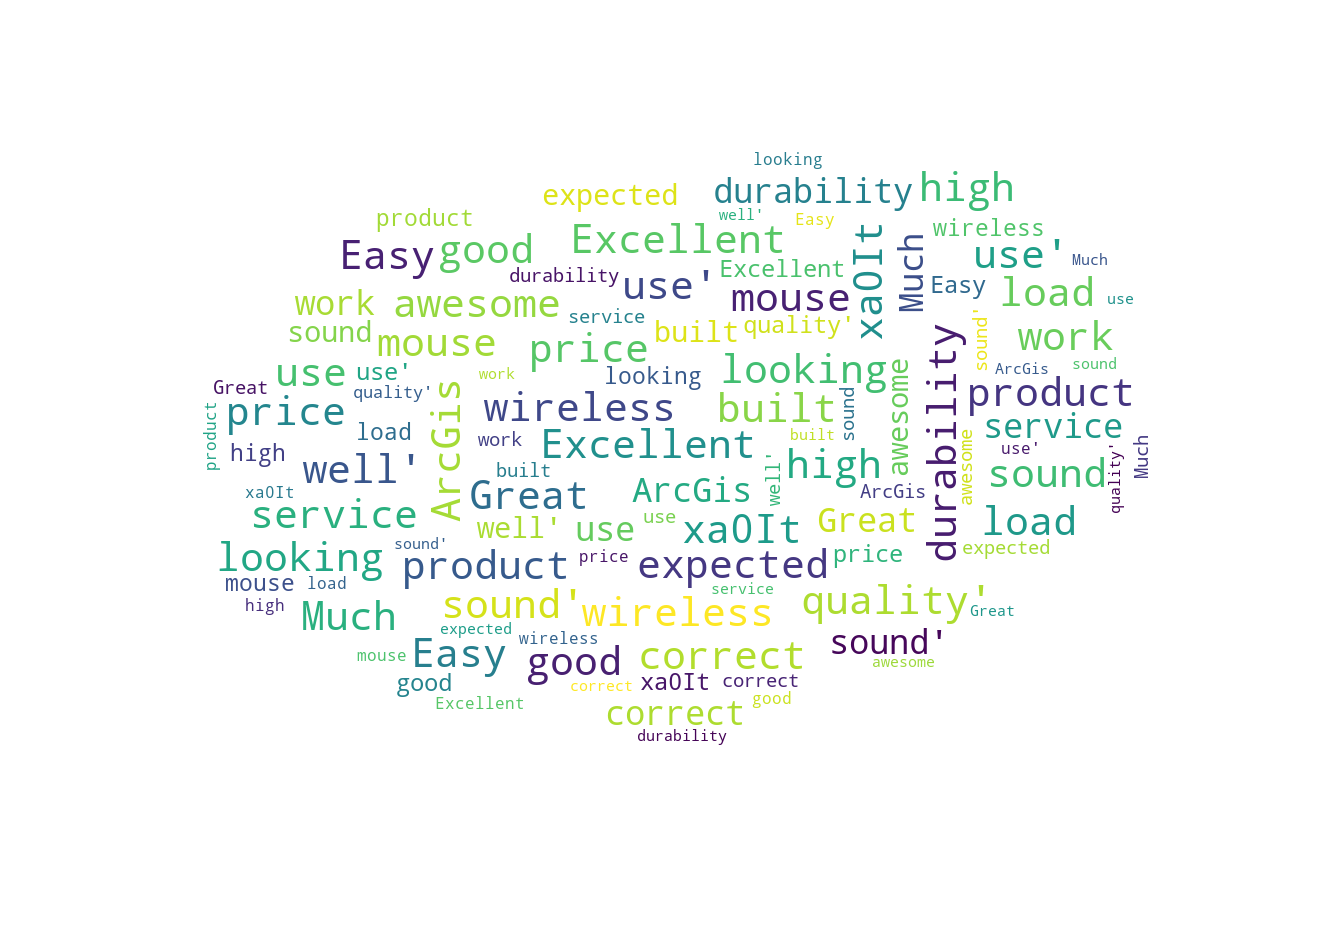

In [112]:
topics_word_cloud("headphone")

Word Cloud file for keyboard_speakers has been cretaed


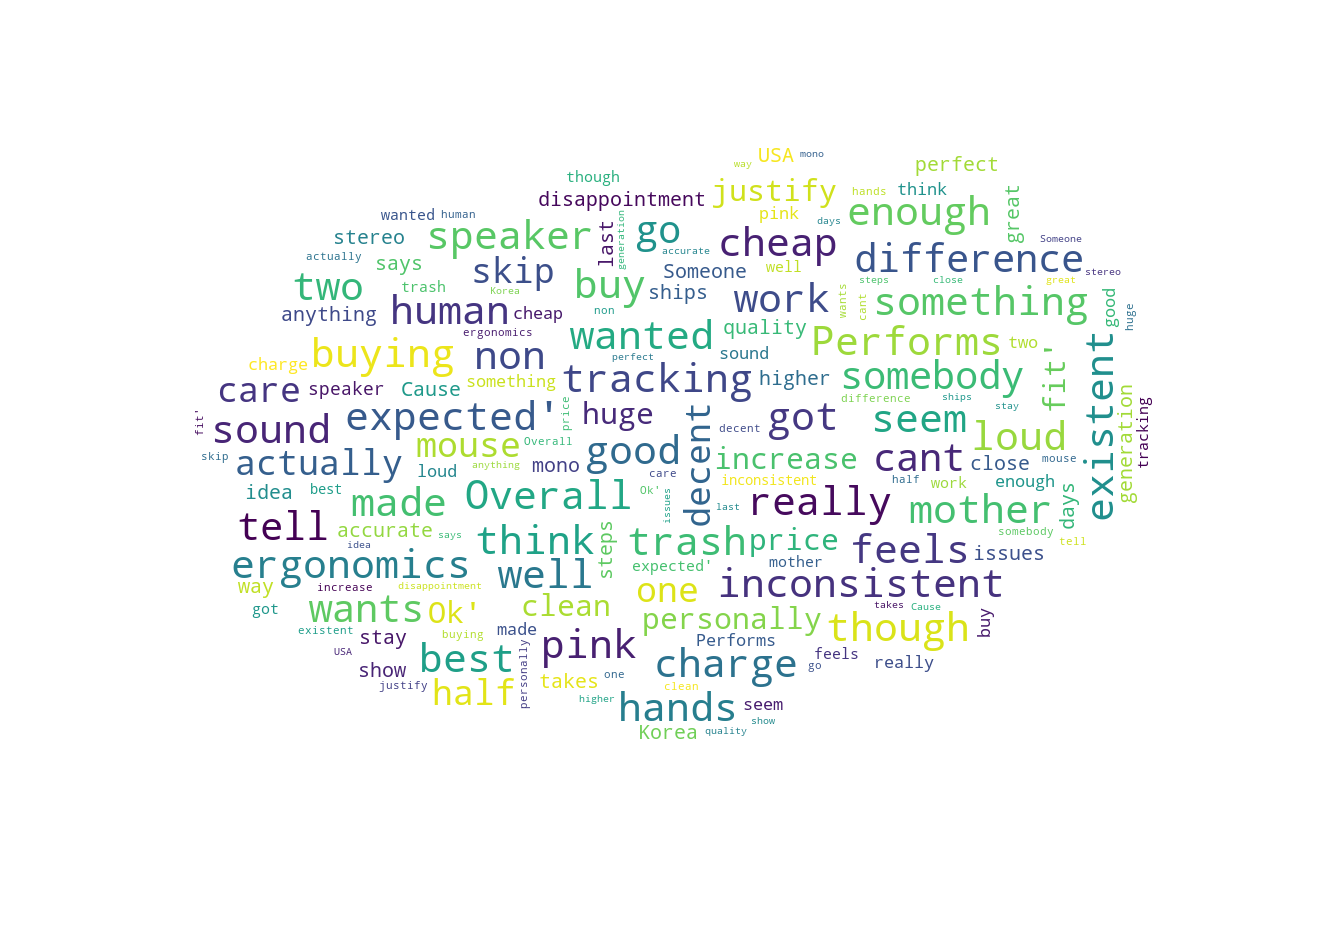

In [114]:
topics_word_cloud("keyboard_speakers")